In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
def read_csv_to_dataframe(file_path, header=None, index_col=None):

    # Reads a CSV file into a pandas DataFrame using a specified delimiter.

    try:
        df = pd.read_csv(file_path, sep=',', header=header, index_col=index_col)
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
    except pd.errors.ParserError:
        print("Error: There was a problem parsing the file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [3]:
def add_header_to_dataframe(df):
    
    # Adds header to a pandas DataFrame.

    
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame.")
    
    # Hardcoded list of column names
    column_names = ['Reference_Pool_ID', 'Loan_Identifier', 'Monthly_Reporting_Period', 'Channel',
    'Seller_Name', 'Servicer_Name', 'Master_Servicer', 'Original_Interest_Rate',
    'Current_Interest_Rate', 'Original_UPB', 'UPB_at_Issuance', 'Current_Actual_UPB',
    'Original_Loan_Term', 'Origination_Date', 'First_Payment_Date', 'Loan_Age',
    'Remaining_Months_to_Legal_Maturity', 'Remaining_Months_To_Maturity', 'Maturity_Date',
    'Original_Loan_to_Value_Ratio', 'Original_Combined_Loan_to_Value_Ratio',
    'Number_of_Borrowers', 'Debt_To_Income', 'Borrower_Credit_Score_at_Origination',
    'Co_Borrower_Credit_Score_at_Origination', 'First_Time_Home_Buyer_Indicator',
    'Loan_Purpose', 'Property_Type', 'Number_of_Units', 'Occupancy_Status',
    'Property_State', 'Metropolitan_Statistical_Area', 'Zip_Code_Short',
    'Mortgage_Insurance_Percentage', 'Amortization_Type', 'Prepayment_Penalty_Indicator',
    'Interest_Only_Loan_Indicator', 'Interest_Only_First_Principal_And_Interest_Payment_Date',
    'Months_to_Amortization', 'Current_Loan_Delinquency_Status', 'Loan_Payment_History',
    'Modification_Flag', 'Mortgage_Insurance_Cancellation_Indicator', 'Zero_Balance_Code',
    'Zero_Balance_Effective_Date', 'UPB_at_the_Time_of_Removal', 'Repurchase_Date',
    'Scheduled_Principal_Current', 'Total_Principal_Current', 'Unscheduled_Principal_Current',
    'Last_Paid_Installment_Date', 'Foreclosure_Date', 'Disposition_Date',
    'Foreclosure_Costs', 'Property_Preservation_and_Repair_Costs', 'Asset_Recovery_Costs',
    'Miscellaneous_Holding_Expenses_and_Credits', 'Associated_Taxes_for_Holding_Property',
    'Net_Sales_Proceeds', 'Credit_Enhancement_Proceeds', 'Repurchase_Make_Whole_Proceeds',
    'Other_Foreclosure_Proceeds', 'Modification_Related_Non_Interest_Bearing_UPB',
    'Principal_Forgiveness_Amount', 'Original_List_Start_Date', 'Original_List_Price',
    'Current_List_Start_Date', 'Current_List_Price', 'Borrower_Credit_Score_At_Issuance',
    'Co_Borrower_Credit_Score_At_Issuance', 'Borrower_Credit_Score_Current',
    'Co_Borrower_Credit_Score_Current', 'Mortgage_Insurance_Type',
    'Servicing_Activity_Indicator', 'Current_Period_Modification_Loss_Amount',
    'Cumulative_Modification_Loss_Amount', 'Current_Period_Credit_Event_Net_Gain_or_Loss',
    'Cumulative_Credit_Event_Net_Gain_or_Loss','Special Eligibility Program','Foreclosure Principal Write-off Amount',
    'Relocation Mortgage Indicator','Zero Balance Code Change Date','Loan Holdback Indicator',
    'Loan Holdback Effective Date','Delinquent Accrued Interest','Property Valuation Method',
    'High Balance Loan Indicator','ARM Initial Fixed-Rate Period  ≤ 5 YR Indicator','ARM Product Type',
    'Initial Fixed-Rate Period','Interest Rate Adjustment Frequency','Next Interest Rate Adjustment Date',
    'Next Payment Change Date','Index','ARM Cap Structure','Initial Interest Rate Cap Up Percent',
    'Periodic Interest Rate Cap Up Percent','Lifetime Interest Rate Cap Up Percent','Mortgage Margin',
    'ARM Balloon Indicator','ARM Plan Number','Borrower Assistance Plan','High Loan to Value (HLTV) Refinance Option Indicator',
    'Deal Name','Repurchase Make Whole Proceeds Flag','Alternative Delinquency Resolution',
    'Alternative Delinquency  Resolution Count','Total Deferral Amount','Payment Deferral Modification Event Indicator','Interest Bearing UPB']  

    if len(column_names) != df.shape[1]:
        raise ValueError("The number of column names must match the number of columns in the DataFrame.")
    
    df.columns = column_names
    
    return df

In [4]:
def drop_loans_with_gaps(df):
    # Group by 'loan_id' and check for gaps in 'loan_age'
    df["Loan_Age"] = df["Loan_Age"].fillna(0).astype(int)

    def has_gap(group):
        # Create a range of expected loan ages
        expected_ages = set(range(1, group['Loan_Age'].max() + 1))
        # Create a set of actual loan ages
        actual_ages = set(group['Loan_Age'])
        # Check if there is a gap
        return expected_ages != actual_ages

    # Identify loan IDs with gaps
    loan_ids_with_gaps = df.groupby('Loan_Identifier').filter(has_gap)['Loan_Identifier'].unique()

    # Drop rows with loan IDs that have gaps
    cleaned_df = df[~df['Loan_Identifier'].isin(loan_ids_with_gaps)]

    return cleaned_df


In [5]:
def clean_date_format(x):
    try:
        # Convert to string and clean it
        x = str(x)
        # Remove any leading zeros and non-numeric characters
        x = ''.join(filter(str.isdigit, x))
        # Get the last 5 or 6 digits
        x = x[-6:] if len(x) >= 6 else x[-5:]
        # Now format it
        if len(x) == 6:  # For format like 102009
            month = x[:2]
            year = x[2:]
        elif len(x) == 5:  # For format like 82009
            month = x[0]
            year = x[1:]
        else:
            return x
        # Ensure month is two digits
        month = month.zfill(2)
        return f"{month}-{year}"
    except:
        return x

In [6]:
def drop_entire_duplicates(df):
    """
    Drop entire duplicate rows from a DataFrame, keeping the first occurrence.

    """
    # Drop entire duplicate rows, keeping the first occurrence
    df_cleaned = df.drop_duplicates(keep='first')
    
    return df_cleaned

In [7]:
def handle_missing_values(df, strategies=None):
    """
    Handle missing values in a DataFrame based on specified strategies for each column.

    Parameters:
    df (pd.DataFrame): The input DataFrame with missing values.
    strategies (dict): A dictionary where keys are column names and values are the strategies to handle missing values.
                       Strategies can be:
                       - 'drop': Drop rows with missing values in this column
                       - 'fill_value': Fill with a specific value (provide the value in the dictionary)
                       - 'mean': Fill with the mean of the column
                       - 'median': Fill with the median of the column
                       - 'mode': Fill with the mode of the column
                       - 'ffill': Forward fill
                       - 'bfill': Backward fill

    Returns:
    pd.DataFrame: DataFrame with missing values handled according to the specified strategies.
    """ 

    missing_threshold=0.5

    missing_ratios = df.isna().mean()
    
    # Get columns to remove based on threshold
    columns_to_remove = missing_ratios[missing_ratios > missing_threshold].index.tolist()
    
    # Remove columns with too many missing values
    if columns_to_remove:
        print(f"Removing columns with more than {missing_threshold*100}% missing values: {columns_to_remove}")
        df = df.drop(columns=columns_to_remove)
    
    for column, strategy in strategies.items():
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in DataFrame.")
            continue
        
        if strategy == 'drop':
            df = df.dropna(subset=[column])
        
        elif strategy == 'fill_value':
            if 'value' in strategies[column]:
                fill_value = strategies[column]['value']
                df[column].fillna(fill_value, inplace=True)
            else:
                print(f"Warning: No fill value provided for column '{column}' with strategy 'fill_value'.")
        
        elif strategy == 'mean':
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
        
        elif strategy == 'median':
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)
        
        elif strategy == 'mode':
            mode_value = df[column].mode()[0]  # Get the first mode
            df[column].fillna(mode_value, inplace=True)
        
        elif strategy == 'ffill':
            df[column].fillna(method='ffill', inplace=True)
        
        elif strategy == 'bfill':
            df[column].fillna(method='bfill', inplace=True)
        
        else:
            print(f"Warning: Unknown strategy '{strategy}' for column '{column}'.")
    
    
    return df   

In [8]:
def visualize_outliers(df, columns):
    """
    Visualize outliers in specified columns of a DataFrame using enhanced plots.
    Converts specified columns to integers before plotting.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    columns (list): A list of column names to visualize for outliers.
    """
    # Set the style for seaborn with a clean, modern look
    sns.set_style("whitegrid", {'grid.linestyle': ':'})
    
    # Define a soothing color palette
    colors = ['#6897bb', '#9b859d', '#7cb8bb', '#8fa6b3']
    
    for column in columns:
        # Convert the column to integers, handling potential errors
        df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)
        
        # Create a more compact figure
        plt.figure(figsize=(15, 4))
        
        # Box Plot with enhanced styling
        plt.subplot(1, 3, 1)
        sns.boxplot(x=df[column], palette='PuBuGn', width=0.5)
        plt.title(f'Box Plot: {column}', fontsize=12, pad=10)
        plt.xlabel(column, fontsize=10)
        
        # Add mean and median lines with subtle styling
        mean_value = df[column].mean()
        median_value = df[column].median()
        plt.axvline(mean_value, color='#ff7f7f', linestyle='--', label='Mean', linewidth=1.5, alpha=0.7)
        plt.axvline(median_value, color='#7f7fff', linestyle='-', label='Median', linewidth=1.5, alpha=0.7)
        plt.legend(fontsize=8)
        
        # Enhanced Histogram
        plt.subplot(1, 3, 2)
        # Create a gradient-filled histogram
        n, bins, patches = plt.hist(df[column], bins=30, density=True, alpha=0.7, 
                                  color=colors[0], edgecolor='white', linewidth=0.5)
        
        # Add color gradient to histogram
        fracs = n / n.max()
        norm = plt.Normalize(fracs.min(), fracs.max())
        for thisfrac, thispatch in zip(fracs, patches):
            color = plt.cm.PuBuGn(norm(thisfrac))
            thispatch.set_facecolor(color)
        
        # Add KDE plot over histogram
        sns.kdeplot(df[column], color='#2c3e50', linewidth=1.5, label='Density')
        plt.title(f'Distribution: {column}', fontsize=12, pad=10)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Density', fontsize=10)
        plt.legend(fontsize=8)
        
        # Add grid with subtle styling
        plt.grid(True, alpha=0.3, linestyle=':')
        
        # KDE Plot with gradient fill
        plt.subplot(1, 3, 3)
        sns.kdeplot(data=df[column], fill=True, color=colors[2], 
                   alpha=0.5, linewidth=1.5, label='KDE')
        plt.title(f'Density: {column}', fontsize=12, pad=10)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Density', fontsize=10)
        plt.legend(fontsize=8)
        
        # Adjust layout and display
        plt.tight_layout(pad=2.0)
        plt.show()



In [9]:
def detect_and_remove_outliers(df, columns):
    """
    Detect and remove outliers from specified columns of a DataFrame using multiple methods.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    columns (list): A list of column names in which to detect and remove outliers.

    Returns:
    pd.DataFrame: A DataFrame without the outliers.
    pd.DataFrame: A DataFrame containing the detected outliers.
    """
    all_outliers = pd.DataFrame()  # DataFrame to store all detected outliers

    for column in columns:

        df[column] = pd.to_numeric(df[column], errors='coerce').astype(int)

        # Method 1: Interquartile Range (IQR) Method
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound_iqr = Q1 - 1.5 * IQR
        upper_bound_iqr = Q3 + 1.5 * IQR
        
        # Method 2: Z-Score Method
        mean = df[column].mean()
        std_dev = df[column].std()
        z_score_threshold = 3  # Common threshold for Z-score
        z_scores = (df[column] - mean) / std_dev
        
        # Method 3: Modified Z-Score Method
        median = df[column].median()
        mad = np.median(np.abs(df[column] - median))  # Median Absolute Deviation
        modified_z_scores = 0.6745 * (df[column] - median) / mad
        
        # Identify outliers using IQR
        outliers_iqr = df[(df[column] < lower_bound_iqr) | (df[column] > upper_bound_iqr)]
        
        # Identify outliers using Z-Score
        outliers_z = df[np.abs(z_scores) > z_score_threshold]
        
        # Identify outliers using Modified Z-Score
        outliers_modified_z = df[np.abs(modified_z_scores) > 3.5]  # Common threshold for Modified Z-score
        
        # Combine all outliers for the current column
        column_outliers = pd.concat([outliers_iqr, outliers_z, outliers_modified_z]).drop_duplicates()
        
        # Append to the all_outliers DataFrame
        all_outliers = pd.concat([all_outliers, column_outliers]).drop_duplicates()

    # Remove outliers from the original DataFrame
    df_cleaned = df[~df.index.isin(all_outliers.index)]
    
    return df_cleaned, all_outliers

In [10]:
def add_next_delinquency_status(df):
    """
    Add a new column showing the next month's delinquency status for each loan.
    
    """
    # Sort the DataFrame by Loan_Identifier and Monthly_Reporting_Period
    df_sorted = df.sort_values(['Loan_Identifier', 'Monthly_Reporting_Period'])
    
    # Create the next status column by shifting within each loan group
    df_sorted['Next_Loan_Delinquency_Status'] = (
        df_sorted.groupby('Loan_Identifier')['Current_Loan_Delinquency_Status']
        .shift(-1)  # Negative shift to get next month's status
    )
    
    # Sort back to original order if needed
    df_result = df_sorted.sort_index()
    
    return df_result

In [11]:
def update_status_column(df):
    """
    Update the specified column in the DataFrame based on the given mapping.
    
    """

    column_name_1 = "Current_Loan_Delinquency_Status"
    column_name_2 = "Next_Loan_Delinquency_Status"
    # Define the mapping
    mapping = {
        0 : "current",
        1: "30dpd",
        2 : "60dpd",
        3 : "90dpd",
        4 : "120dpd",
        5 : "150dpd",
        6 : "180dpd",
    }

    # Add charged_off status for values 5-10
    for i in range(7, 33):
        mapping[i] = "charged_off"

    # Use .loc to avoid SettingWithCopyWarning
    df.loc[:, column_name_1] = df[column_name_1].map(mapping).fillna(np.nan)
    df.loc[:, column_name_2] = df[column_name_2].map(mapping).fillna(np.nan)


    df = df.dropna(subset=['Next_Loan_Delinquency_Status'])

    return df

In [12]:
def analyze_loan_transitions(df):
    """
    Analyze transitions between loan delinquency status and create a transition matrix.
    
    """

    current_status_col = "Current_Loan_Delinquency_Status"
    next_status_col = "Next_Loan_Delinquency_Status"

    # Calculate transition counts and probabilities
    transition_counts = pd.crosstab(
        df[current_status_col],
        df[next_status_col]
    )
    
    transition_matrix = pd.crosstab(
        df[current_status_col],
        df[next_status_col],
        normalize='index'
    )

    rows = [ 'current', '30dpd', '60dpd', '90dpd', '120dpd', '150dpd', '180dpd', 'charged_off'] 
    cols = [ 'current', '30dpd', '60dpd', '90dpd', '120dpd', '150dpd', '180dpd', 'charged_off']
    transition_matrix = transition_matrix[cols]
    transition_matrix = transition_matrix.reindex(rows)


    return transition_matrix

In [13]:
def weighted_average_age(df):

    # Calculating weighted average 
    
    wavg = ((df["Loan_Age"]*df["Current_Actual_UPB"]).sum()/df["Current_Actual_UPB"].sum())
    wavg = int(wavg.round(0))
    return wavg

In [14]:
def compute_cgl_curve(transition_matrix, wavg):
    """
    Computes the Cgl Curve based on the initial state and transition matrix.

    """
    initial_state = np.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

    Cgl_Curve = []
    
    for i in range(wavg + 12):
        state_probability = np.dot(initial_state, np.linalg.matrix_power(transition_matrix, i))
        Cgl_Curve.append(state_probability)
    
    #Cgl_Curve = pd.DataFrame(Cgl_Curve)
    return Cgl_Curve

In [15]:
def compute_ALLL(Cgl_Curve,wavg):

    ALLL =Cgl_Curve[wavg+11][7]-Cgl_Curve[wavg-1][7]

    return ALLL


In [16]:
df = read_csv_to_dataframe("output.csv")

C:\Users\Sachin Rawat\AppData\Local\Temp\ipykernel_20516\8551812.py:6: DtypeWarning: Columns (0,6,8,10,11,24,33,37,38,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,77,78,79,81,82,83,84,87,88,89,90,91,92,93,94,95,96,97,98,99,100,103,105,106,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=',', header=header, index_col=index_col)


In [17]:
df = add_header_to_dataframe(df)

In [18]:
df = drop_loans_with_gaps(df)

In [19]:
date_columns = [
    'Monthly_Reporting_Period',
    'Origination_Date',
    'First_Payment_Date',
    'Maturity_Date',
    'Interest_Only_First_Principal_And_Interest_Payment_Date',
    'Zero_Balance_Effective_Date',
    'Repurchase_Date',
    'Last_Paid_Installment_Date',
    'Foreclosure_Date',
    'Disposition_Date',
    'Original_List_Start_Date',
    'Current_List_Start_Date',
    'Zero Balance Code Change Date',
    'Loan Holdback Effective Date',
    'Next Interest Rate Adjustment Date',
    'Next Payment Change Date'
]

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [20]:
# Applying to date columns
for col in date_columns:
    if col in df.columns:
        df[col] = df[col].apply(clean_date_format)
        

In [21]:
df = drop_entire_duplicates(df)

In [22]:
strategies = {
    'Current_Interest_Rate':'ffill',
    'Original_Interest_Rate':'ffill',
}

    # Handle missing values
df = handle_missing_values(df, strategies)

Removing columns with more than 50.0% missing values: ['Reference_Pool_ID', 'Master_Servicer', 'UPB_at_Issuance', 'Co_Borrower_Credit_Score_at_Origination', 'Mortgage_Insurance_Percentage', 'Months_to_Amortization', 'Mortgage_Insurance_Cancellation_Indicator', 'Zero_Balance_Code', 'UPB_at_the_Time_of_Removal', 'Scheduled_Principal_Current', 'Unscheduled_Principal_Current', 'Foreclosure_Costs', 'Property_Preservation_and_Repair_Costs', 'Asset_Recovery_Costs', 'Miscellaneous_Holding_Expenses_and_Credits', 'Associated_Taxes_for_Holding_Property', 'Net_Sales_Proceeds', 'Credit_Enhancement_Proceeds', 'Repurchase_Make_Whole_Proceeds', 'Other_Foreclosure_Proceeds', 'Modification_Related_Non_Interest_Bearing_UPB', 'Principal_Forgiveness_Amount', 'Original_List_Price', 'Current_List_Price', 'Borrower_Credit_Score_At_Issuance', 'Co_Borrower_Credit_Score_At_Issuance', 'Borrower_Credit_Score_Current', 'Co_Borrower_Credit_Score_Current', 'Mortgage_Insurance_Type', 'Current_Period_Modification_Loss_

C:\Users\Sachin Rawat\AppData\Local\Temp\ipykernel_20516\1064621016.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(method='ffill', inplace=True)
C:\Users\Sachin Rawat\AppData\Local\Temp\ipykernel_20516\1064621016.py:61: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column].fillna(method='ffill', inplace=True)


C:\Users\Sachin Rawat\AppData\Local\Temp\ipykernel_20516\3027319730.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='PuBuGn', width=0.5)


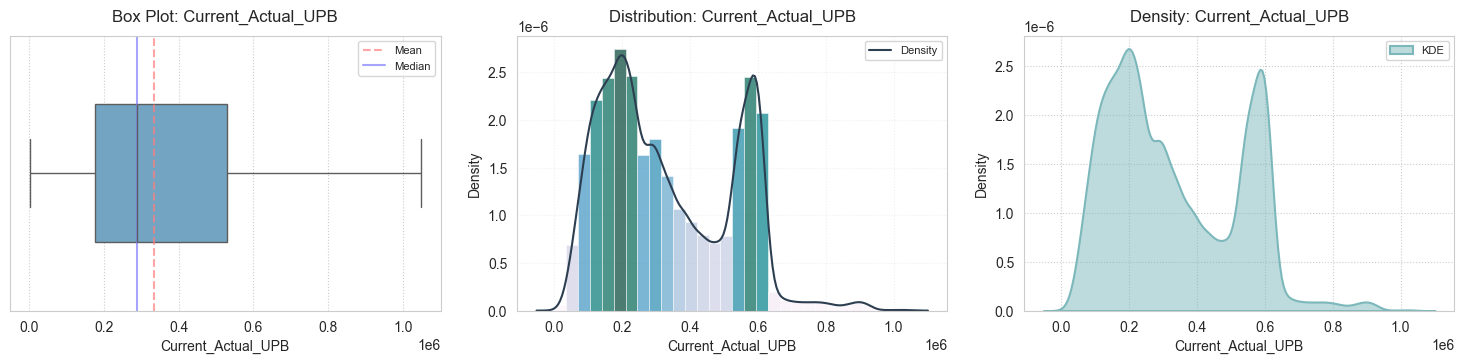

C:\Users\Sachin Rawat\AppData\Local\Temp\ipykernel_20516\3027319730.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='PuBuGn', width=0.5)


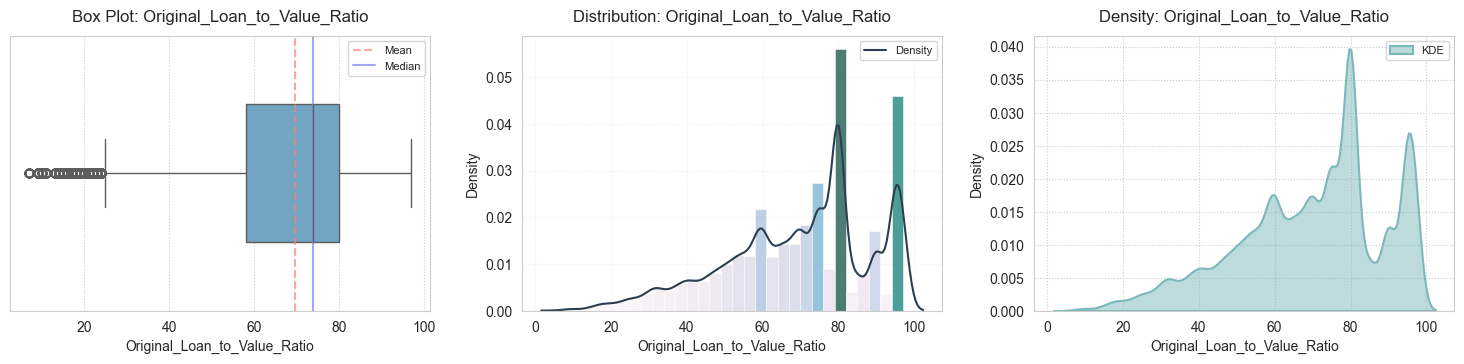

C:\Users\Sachin Rawat\AppData\Local\Temp\ipykernel_20516\3027319730.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='PuBuGn', width=0.5)


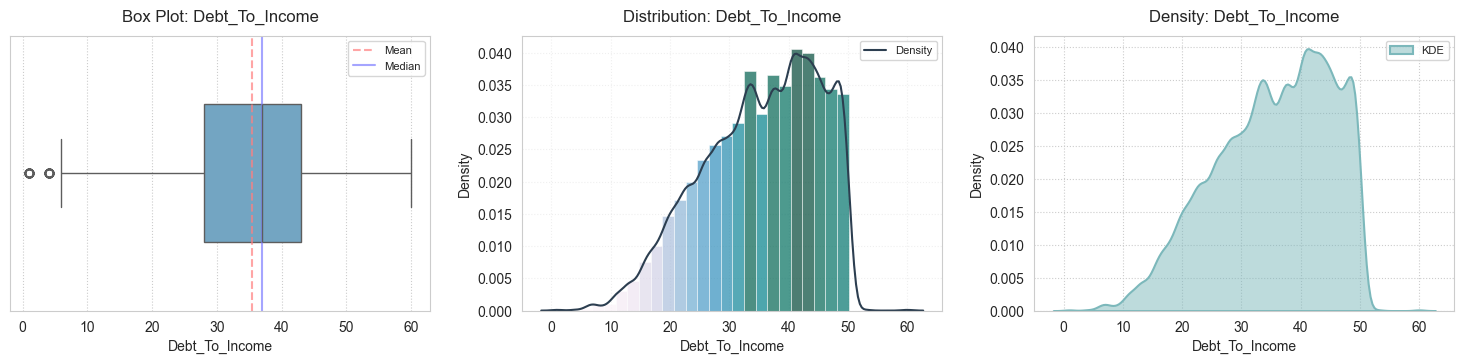

C:\Users\Sachin Rawat\AppData\Local\Temp\ipykernel_20516\3027319730.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='PuBuGn', width=0.5)


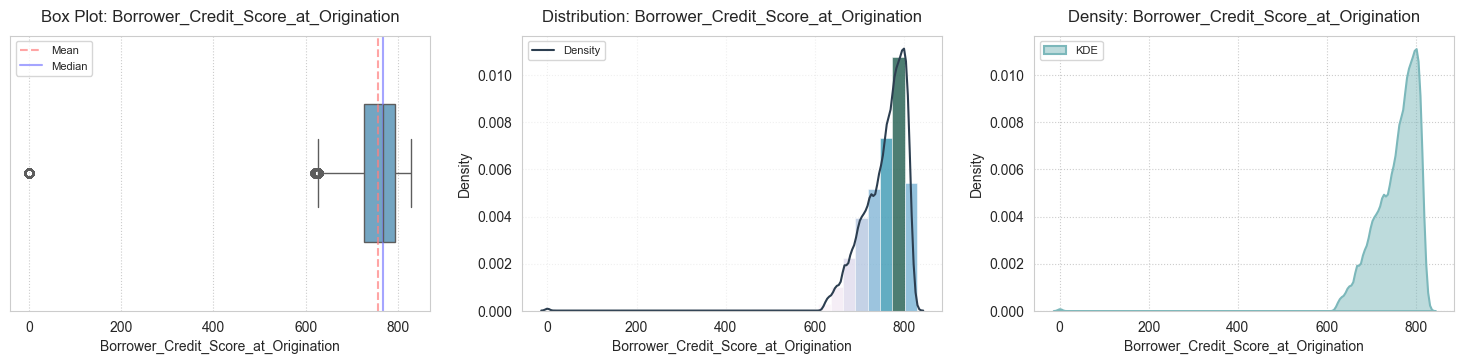

C:\Users\Sachin Rawat\AppData\Local\Temp\ipykernel_20516\3027319730.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='PuBuGn', width=0.5)


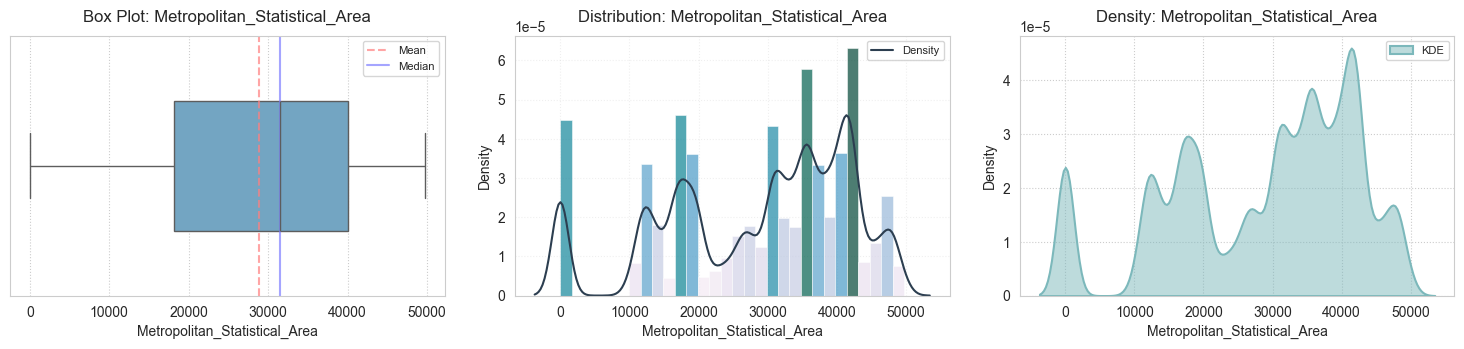

C:\Users\Sachin Rawat\AppData\Local\Temp\ipykernel_20516\3027319730.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='PuBuGn', width=0.5)


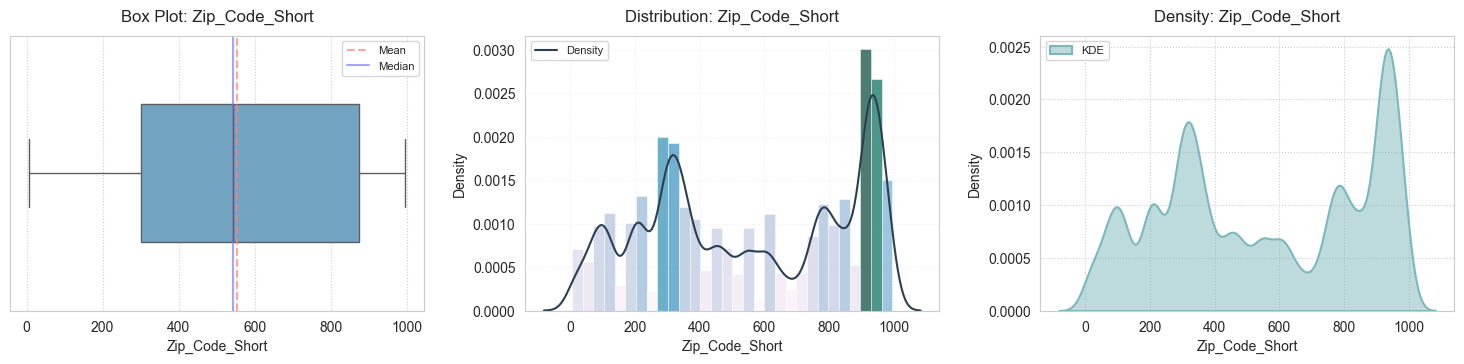

In [23]:
# Visualize outliers in the specified columns
columns_to_visualize = ["Current_Actual_UPB" ,'Original_Loan_to_Value_Ratio',  'Debt_To_Income', 'Borrower_Credit_Score_at_Origination','Metropolitan_Statistical_Area', 'Zip_Code_Short']
visualize_outliers(df, columns_to_visualize)    

In [24]:
columns_to_check = []
df, outliers = detect_and_remove_outliers(df, columns_to_check)

In [25]:
df = add_next_delinquency_status(df)

In [26]:
df = update_status_column(df)

C:\Users\Sachin Rawat\AppData\Local\Temp\ipykernel_20516\3492564815.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['current' 'current' 'current' ... 'current' 'current' 'current']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, column_name_1] = df[column_name_1].map(mapping).fillna(np.nan)
C:\Users\Sachin Rawat\AppData\Local\Temp\ipykernel_20516\3492564815.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['current' 'current' 'current' ... 'current' 'current' 'current']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, column_name_2] = df[column_name_2].map(mapping).fillna(np.nan)


In [27]:
TMM = analyze_loan_transitions(df)

In [28]:
TMM

Next_Loan_Delinquency_Status,current,30dpd,60dpd,90dpd,120dpd,150dpd,180dpd,charged_off
Current_Loan_Delinquency_Status,,,,,,,,
current,0.991093,0.005423,0.001026,0.000566,0.000430,0.000324,0.000332,0.000807
30dpd,0.792473,0.120430,0.034409,0.012903,0.006452,0.005376,0.004301,0.023656
60dpd,0.702564,0.112821,0.046154,0.046154,0.020513,0.005128,0.010256,0.056410
90dpd,0.698276,0.094828,0.034483,0.060345,0.017241,0.008621,0.000000,0.086207
120dpd,0.683544,0.063291,0.050633,0.025316,0.012658,0.012658,0.012658,0.139241
150dpd,0.678571,0.071429,0.071429,0.053571,0.000000,0.017857,0.035714,0.071429
180dpd,0.767857,0.053571,0.035714,0.035714,0.053571,0.000000,0.000000,0.053571
charged_off,0.537234,0.074468,0.069149,0.058511,0.042553,0.063830,0.021277,0.132979


In [29]:
WAVG = weighted_average_age(df)

In [30]:
WAVG

17

In [31]:
CGL_CURVE = compute_cgl_curve(TMM,WAVG)

In [32]:
CGL_CURVE

[array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([9.91092708e-01, 5.42281353e-03, 1.02573385e-03, 5.65662051e-04,
        4.29903159e-04, 3.24312909e-04, 3.31855070e-04, 8.07011193e-04]),
 array([9.88880121e-01, 6.32519394e-03, 1.38262431e-03, 7.99399900e-04,
        5.49413932e-04, 4.23460108e-04, 3.96938283e-04, 1.24284881e-03]),
 array([9.88249396e-01, 6.53488714e-03, 1.48153146e-03, 8.76531263e-04,
        5.89181013e-04, 4.62541937e-04, 4.18072553e-04, 1.38785837e-03]),
 array([9.88061648e-01, 6.59243238e-03, 1.51091153e-03, 9.00439457e-04,
        6.01427630e-04, 4.75094109e-04, 4.24764052e-04, 1.43328261e-03]),
 array([9.88004942e-01, 6.60933909e-03, 1.51977612e-03, 9.07753776e-04,
        6.05179495e-04, 4.78977961e-04, 4.26820373e-04, 1.44721151e-03]),
 array([9.87987736e-01, 6.61442366e-03, 1.52246503e-03, 9.09981842e-04,
        6.06322510e-04, 4.80164906e-04, 4.27447751e-04, 1.45145853e-03]),
 array([9.87982508e-01, 6.61596434e-03, 1.52328201e-03, 9.10659698e-04,
        6.

In [33]:
ALLL = compute_ALLL(CGL_CURVE,WAVG)

In [34]:
ALLL

np.float64(1.2550400172242626e-11)

In [35]:
CECL = 1.5 * ALLL

In [36]:
CECL

np.float64(1.882560025836394e-11)